In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#            print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
print("tensorflow version :",tf.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


tensorflow version : 2.12.0


In [3]:
import tensorflow_hub as hub

print("version of  tensorflow hub =",hub.__version__)

version of  tensorflow hub = 0.12.0


In [4]:
labels_csv=pd.read_csv("/kaggle/input/dog-breed-identification/labels.csv")
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<Axes: xlabel='breed'>

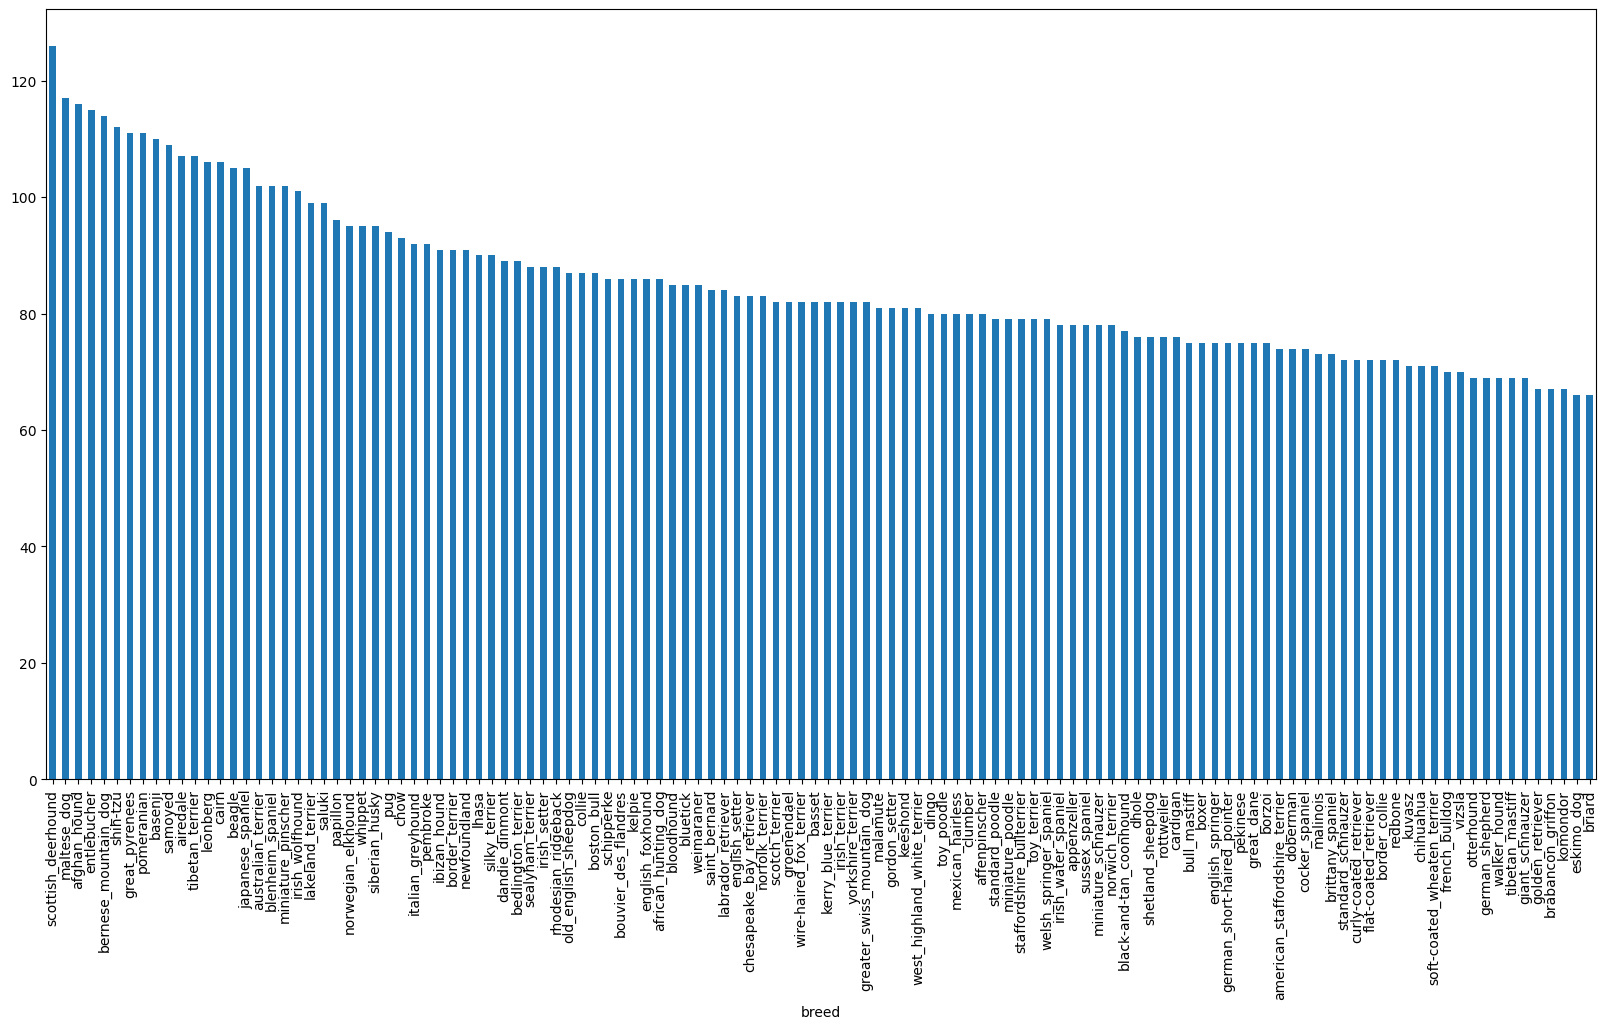

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

# Getting images and their labels 

In [6]:
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [7]:
filenames=["/kaggle/input/dog-breed-identification/train/"+fname+".jpg"for fname in labels_csv["id"]]

filenames[:1]
# Image.open(filenames[1])

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg']

In [8]:
from PIL import Image

# Image.open(filenames[1])

In [9]:
a=len(os.listdir("/kaggle/input/dog-breed-identification/train"))
b=len(filenames)
if(a==b):
    print("continue")
else:
    print("kindly verify data integrity")
        

continue


In [10]:
labels=labels_csv["breed"].to_numpy()
len(labels)

10222

In [11]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [12]:
# turmning a single value to an array of booleans 
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# turning every label to a boolean label 

boolean_labels=[label==unique_breeds for label in labels ]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [14]:
len(boolean_labels), len(labels)

(10222, 10222)

In [15]:
print(labels[0])

print(np.where(unique_breeds==labels[0]))

print(boolean_labels[0].argmax())

print(boolean_labels[0].astype(int))


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [16]:
print (labels[2] )

print ( boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [17]:
filenames[:1]

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg']

# Creating our own validation set and performing train test split on the given data set

* creating X and y
* mapping X to filenames
* mapping y to boolean_labels

In [18]:
X=filenames
y=boolean_labels

In [19]:
len(X)

10222

In [20]:
len(y)

10222

* we are going to first work on ~ 1000 images and then increase as needed 

In [21]:
NUM_IMAGES = 1000 
# @ param{type:"slider",min:1000, max:10000, step:1000}

In [22]:
#  performing train_test_split
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val, y_train , y_val = train_test_split(X[:NUM_IMAGES]
                                                  , y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                      random_state=42)

len(X_train) , len(y_train) , len(X_val) , len(y_val)

(800, 800, 200, 200)

In [24]:
print(X_train[:1])
print(y_train[:1])

['/kaggle/input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
   

# Pre Processing The Images 
In order to preprocess the images we'll write a function that converts the images to tensors 
1. Take an image filepath as input
2. Using TensorFlow read that file and store in a variable `image`
3. turn our `image` (jpg) into tensor
4. convert the colour channel values from 0-255 to 0-1
5. resize the `image` to be a shape of (224 , 224)
6. return the modified `image`

In [25]:
# define image size 

IMG_SIZE = 224

def process_image(image_path,img_size=IMG_SIZE):
    """
    takes an image path and returns a tensor for that image 
    """
    
#     reading an image 
    image=tf.io.read_file(image_path)
    
#     convert the jpeg image to numerical tensors with 3 colour channels RGB
    image=tf.image.decode_jpeg(image,channels=3)
    
#     convert the values from 0-255 to 0-1
    image=tf.image.convert_image_dtype(image,tf.float32)
    
#     resize the image to img_size
    image=tf.image.resize(image,size=[img_size,img_size])
    
    return image

## Convrting the data into mini batches of size 32

In [26]:
def get_image_label(image_path,label):
    """
    takes an image processes it and returns the (image , label)
    """
    image=process_image(image_path)
    return image,label
    

In [27]:
get_image_label(X[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## Creating mini batches for training the models

In [28]:
# declaring batch size 32

BATCH_SIZE=32

# creating a fn to convert dat into bacthes 

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    creates batches of size 32 out of images X and labels y
    shuffles the data if its training set but not if it is a validation set 
    also accepts test_data as input i.e data with no labels 
    """
    if test_data==True:
        print("creating test data batches ....")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
#         the above line converts file path tensors to tensor data frame 
        data_batch=data.map(process_image).batch(batch_size)
        return data_batch    
#     if the valid data set is given ,no need to shuffle it 
    elif valid_data==True :
        print("ceretaing validation data set ......")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) #label
        data_batch=data.map(get_image_label).batch(batch_size)
#         data_batch=data.map(get_image_label).batch(batch_size)
        return data_batch
    else:
        print("creating training batches ... ")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        
        data = data.shuffle(buffer_size=len(X))
        data=data.map(get_image_label)
#         data=data.map(process_image)
#         creating data_bacth 
        data_batch=data.batch(batch_size)
        return data_batch

In [29]:
X_train[:1],y_train[:1]
train_data=create_data_batches(X_train,y_train)
# X_train.type()
# y_train.dtype()
val_data=create_data_batches(X_val,y_val,valid_data=True)

creating training batches ... 
ceretaing validation data set ......


In [30]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#  Visualizing data batches 

In [31]:
import matplotlib.pyplot as plt

# showing 25 images
def show_25_images(images,labels):
    """
    displays 25 images
    """
    plt.figure(figsize=(10,10))
    
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[y[i].argmax()])
        plt.axis("off")

In [32]:
train_images,train_labels = next(train_data.as_numpy_iterator())

In [33]:
len(train_images),len(train_labels)

(32, 32)

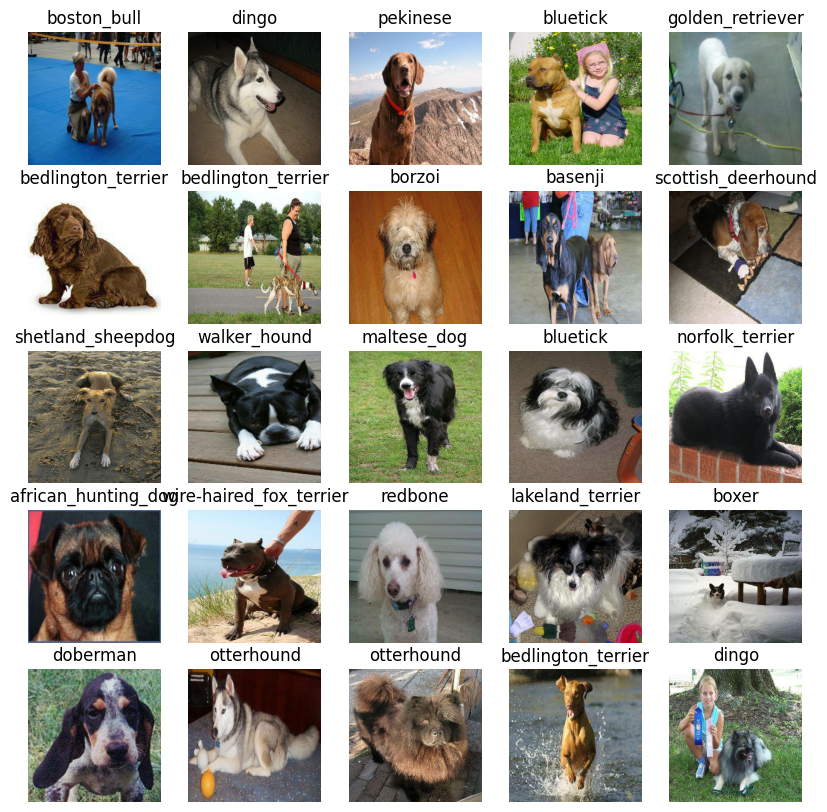

In [34]:

show_25_images(train_images,train_labels)

In [35]:
val_images,val_labels=next(val_data.as_numpy_iterator())

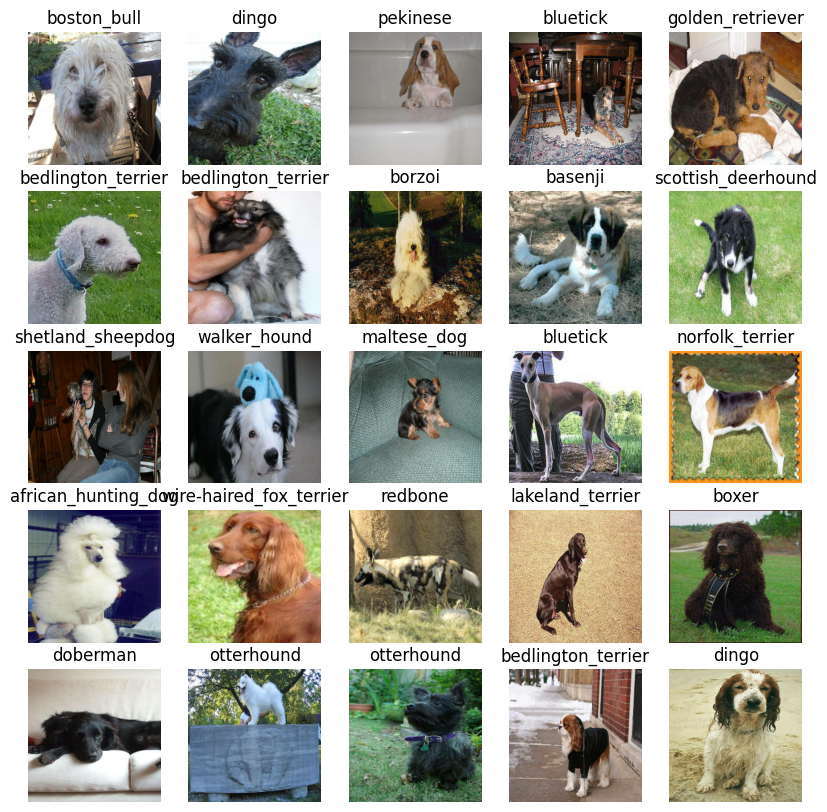

In [36]:
show_25_images(val_images,val_labels)

## Building a model
b4 building few steps :
    * The input shape (our image shape , in the form of Tensors to our model )
    * The output shape (the image labels , in the form of Tensors to our model )
    * The URL of the model we want to use

In [37]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
#           batch,height,width,colour channels
OUTPUT_SHAPE=len(unique_breeds)

# setup  model url 
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

#  building a function for model fitting and training and testing 
* takes input shape , o/p shape and model chosen as parameter 
* defines the layers in keras model in a sequential fashion
* compiles the model 
* builds the model 
* returns the model 

In [38]:
# creating a fn which builds a keras model 
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("building  model with ",model_url)
#     setting up the model layer 
    model =tf.keras.Sequential([hub.KerasLayer(model_url), #layer 1 -> input layer 
        tf.keras.layers.Dense(units=output_shape,
                             activation="softmax") # layer 2 -> output layuer 
        
    ])
#     compiling the model 
#     model.compile(
#                 loss =tf.keras.losses.CategoricalCrossentropy(),
#                  optimizers=tf.keras.optimizers.Adam(),
#                  metrics=["accuracy"]
#                  )
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     building the model 
    model.build(input_shape)
    return model

In [39]:
model = create_model()
model.summary()


building  model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


#  creating call back functions 
* call back functons are helper fns used to by the model to :
    1. save its progress 
    2. stop early
    3. check its progress

# tensor board  call back function
steps:
    1. load the tensorboard notebook extension
    2. create a tensorboard callback which is able to save logs to save logs in a directory and pass it to our model's `fit()` fn
    3. visualize our models training  logs 

In [40]:
# load tensorboard 
%load_ext tensorboard

In [41]:
import datetime
def create_tensorboard_callback():
    logdir=os.path.join("/kaggle/working/logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

# early stopping call back 
* early stopping helps stop our model from overfitting

In [42]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                               patience = 3)

In [43]:
 NUM_EPOCHS=100
    

# lets cerate a fn which trains a model :
* create a fn using create_model()
        
* setup a tensor board callback using `create_tensorboard_callback()`
* call the `fit()` fn on our model passing it the training ,validation             data ,no. of epochs  to  train (`NUM_EPOCHS`) and the call back we               would like to use 
* return the model 

In [44]:
# building a fn to train a model and rreturn the trained model


def train_model():
    """
    trains a given model and returns the trained model 
    """

    
    #     create the model 
    
    model=create_model()    

    
    #     creating a new tensorboard session everyime we train a model 
    
    tensorboard=create_tensorboard_callback()

    
    #     fitting the model to the data
    
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard,early_stopping])

    
    #     return the fitted model 
    
    return model

In [45]:
model=train_model()

building  model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 20s 297ms/step - loss: 4.4913 - accuracy: 0.1088 - val_loss: 3.4720 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 3s 135ms/step - loss: 1.6274 - accuracy: 0.6875 - val_loss: 2.2195 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 2s 98ms/step - loss: 0.5737 - accuracy: 0.9362 - val_loss: 1.6930 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 3s 101ms/step - loss: 0.2563 - accuracy: 0.9837 - val_loss: 1.5345 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 2s 93ms/step - loss: 0.1486 - accuracy: 0.9962 - val_loss: 1.4393 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 3s 103ms/step - loss: 0.1012 - accuracy: 0.9987 - val_loss: 1.3916 - val_accuracy: 0.6250
Epoch 7/100
25/25 [==============================

In [46]:
logs="/kaggle/working/logs"

In [47]:
# %load_ext tensorboard
%reload_ext tensorboard

In [48]:
tensorboard --logdir=logs --port=6008

In [49]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 120ms/step


array([[5.2443533e-03, 1.0422561e-04, 3.6702867e-04, ..., 1.5460540e-04,
        2.7542445e-05, 5.2096061e-03],
       [1.2711487e-03, 1.6145868e-03, 5.2834828e-03, ..., 1.0436125e-03,
        5.5538067e-03, 7.9336588e-04],
       [4.9399532e-06, 3.2999786e-05, 2.4217284e-06, ..., 4.3149685e-05,
        6.9609382e-06, 3.5684303e-04],
       ...,
       [7.8356334e-06, 8.5461259e-05, 3.6652920e-05, ..., 7.8358920e-05,
        6.3058760e-05, 4.8489808e-05],
       [1.3273859e-03, 9.7614108e-04, 6.0405902e-05, ..., 2.8632869e-05,
        9.4507941e-06, 2.6728453e-03],
       [1.8878158e-03, 6.1492724e-06, 1.5651101e-03, ..., 9.8451460e-03,
        4.0700065e-04, 8.2848579e-05]], dtype=float32)

# we'll create a function to show the real observed and prdicted value on the val_data

**Note:** prediction probablities is also known as confidence level


In [50]:
def get_pred_label(prediction_probablities):
    
    """
    turns an array of prediction probablity into a label 
    """
    
    return unique_breeds[np.argmax(prediction_probablities)]

In [51]:
pred_label=get_pred_label(predictions[0])
pred_label
print(f'name of dog breed  {pred_label}')

name of dog breed  border_terrier


since our validation data set is still in batches we first need to unbacthify it to make predictions on the validation images and then compare these predictions to the validation labels (truth labels)

In [52]:
def unbatchify(data):
    
    images=[]
    
    labels=[]
    
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels
    

In [53]:
val_images,val_labels=unbatchify(val_data)
val_images[0]
val_labels[0]


'cairn'

In [54]:
get_pred_label(val_labels[0])

'affenpinscher'

In [55]:
def plot_pred(n=1):
    """
    view the prediction , true value ,image for a sample n
    """
    pass
#     print(f'true label :{})

In [56]:
def plot_pred(labels ,images, n=0,prediction_probabilities=predictions):
    """
    view the prediction,truth label and image for sample n
    """
    images_=val_images[n]

    
    pred_label=get_pred_label(predictions[n])
    print(f'the predicted label is {pred_label}')
    
    true_labels=val_labels[n]
    
    print(f'the actual label is {true_labels}')
    
    print(f'the % of match is {np.max(predictions[n])*100} %')
    
    
    if true_labels==pred_label:
        colour="green"
    else:
        colour="red"
        
    

    plt.axis('off')
    
    plt.title(true_labels, fontsize=16, fontweight="bold", color=colour)
    plt.imshow(images[n])


the predicted label is groenendael
the actual label is groenendael
the % of match is 65.02296328544617 %


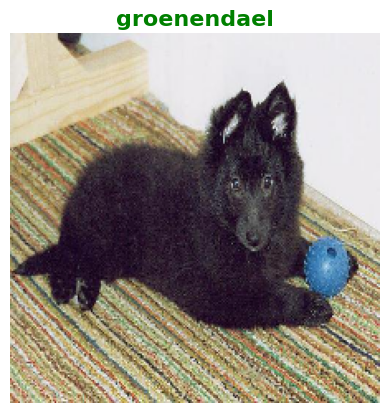

In [57]:
plot_pred(images=val_images,
         labels=val_labels,
          n=77)

In [58]:
def save_model(model,suffix=None):
    """
    saves given model in the model directory
    """
    model_dir=os.path.join("/kaggle/working/model",
                          datetime.datetime.now().strftime("%d%m%Y-%H%M%s"))
    model_path=model_dir+"-"+suffix+".h5"
    
    print(f"svaing model to {model_path}...")
    
    model.save(model_path)
    
    return model_path


In [59]:
def load_model(model_path):
    """
    loads a saved model from its path
    """
    print(f"loading saved model from {model_path} ")
    
    model=tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
    
    return model

In [60]:
mp=save_model(model,suffix="1000-images-mobilenetv2")

svaing model to /kaggle/working/model/30092023-07271696058830-1000-images-mobilenetv2.h5...


In [61]:
pretrained_model=load_model(mp)

loading saved model from /kaggle/working/model/30092023-07271696058830-1000-images-mobilenetv2.h5 


In [62]:
# evaluating the pre saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 66ms/step - loss: 1.2594 - accuracy: 0.6450


[1.2593677043914795, 0.6449999809265137]

In [63]:
# evaluating the saved model 

pretrained_model.evaluate(val_data)

7/7 [==============================] - 1s 75ms/step - loss: 1.2594 - accuracy: 0.6450


[1.2593677043914795, 0.6449999809265137]

In [64]:
full_data=create_data_batches(X,y)

creating training batches ... 


In [65]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [66]:
full_model=create_model()

building  model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [67]:
full_model_tensorboard= create_tensorboard_callback()

full_model_early_stopping= tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                            patience=3)

In [68]:
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 74s 219ms/step - loss: 1.3571 - accuracy: 0.6634
Epoch 2/100
320/320 [==============================] - 26s 81ms/step - loss: 0.4055 - accuracy: 0.8811
Epoch 3/100
320/320 [==============================] - 25s 77ms/step - loss: 0.2392 - accuracy: 0.9342
Epoch 4/100
320/320 [==============================] - 28s 87ms/step - loss: 0.1544 - accuracy: 0.9633
Epoch 5/100
320/320 [==============================] - 27s 85ms/step - loss: 0.1066 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 26s 80ms/step - loss: 0.0784 - accuracy: 0.9854
Epoch 7/100
320/320 [==============================] - 25s 77ms/step - loss: 0.0584 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 23s 73ms/step - loss: 0.0465 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 25s 77ms/step - loss: 0.0374 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 24s 74ms/step - 

In [69]:
# saving the fully trained model 

save_model(full_model,suffix="trained-on-full-10222-images-mobilenetv2")

svaing model to /kaggle/working/model/30092023-07371696059460-trained-on-full-10222-images-mobilenetv2.h5...


'/kaggle/working/model/30092023-07371696059460-trained-on-full-10222-images-mobilenetv2.h5'

In [70]:
# saved_full_model=load_model("/kaggle/working/model/28092023-20241695932684-trained-on-full-10222-images-mobilenetv2.h5")

# making predictions on the test data set 

In [71]:
test_path="/kaggle/input/dog-breed-identification/test/"


In [72]:
test_filename=[test_path + fname for fname in os.listdir(test_path)]

test_filename[0]

len(test_filename)

10357

In [73]:
test_data=create_data_batches(test_filename,test_data=True)

creating test data batches ....


In [74]:

test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [75]:
test_predictions=full_model.predict(test_data,verbose=1)

324/324 [==============================] - 60s 184ms/step


In [76]:
test_predictions[1]

array([8.90600798e-14, 2.66996270e-09, 2.79513581e-13, 6.46473292e-11,
       3.39190037e-10, 4.84339679e-10, 6.42155529e-09, 1.58425251e-09,
       1.05033404e-08, 9.56991777e-12, 2.31817648e-10, 8.31067460e-14,
       2.43702782e-08, 1.33953465e-11, 5.03118554e-06, 6.41480702e-10,
       4.97103803e-10, 1.98297867e-09, 7.31257156e-12, 1.36318266e-11,
       1.46048850e-11, 9.31407307e-09, 1.00627484e-09, 5.02690684e-12,
       1.19957221e-11, 1.19733596e-12, 9.33075123e-13, 1.18341933e-10,
       2.01276311e-08, 2.87590759e-14, 3.43848755e-10, 2.96122155e-11,
       2.68082029e-10, 3.29703556e-11, 9.49004098e-10, 2.78232104e-10,
       2.16764473e-08, 2.21617591e-09, 6.64586297e-09, 1.36737144e-09,
       8.02643924e-11, 7.67619648e-11, 2.93510383e-10, 6.35492423e-11,
       1.56019675e-09, 3.34542913e-13, 1.25330779e-11, 2.31752534e-11,
       3.47150086e-11, 6.52434096e-07, 5.11489517e-10, 5.18237471e-08,
       7.16456213e-07, 2.23504722e-11, 3.02294409e-12, 1.52778540e-10,
      

In [77]:
test_predictions.shape

(10357, 120)

In [78]:
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head(1)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [79]:
test_ids= [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [80]:
preds_df["id"]=test_ids

In [81]:
preds_df.head(1)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,2.464590e-10,6.192717e-14,1.758799e-09,9.899276e-10,3.711872e-02,8.080752e-11,2.251514e-08,3.448748e-07,3.220008e-11,...,1.379193e-08,1.501476e-07,8.439395e-09,4.573470e-09,4.124742e-11,3.534136e-13,1.113728e-08,2.039487e-06,2.347129e-08,6.229419e-10
1,f7a32505c12649183c5991ecfa7d68b3,8.906008e-14,2.669963e-09,2.795136e-13,6.464733e-11,3.391900e-10,4.843397e-10,6.421555e-09,1.584253e-09,1.050334e-08,...,4.611341e-11,1.361569e-11,4.249526e-06,3.365054e-07,3.007177e-11,2.982192e-12,1.196660e-13,1.564671e-08,8.700290e-12,4.432372e-12
2,bc6d50ffb4644feb34530aa58943e85b,3.498372e-10,9.393608e-05,3.811767e-09,2.298230e-07,2.099697e-08,1.421924e-09,1.310474e-10,4.209511e-11,4.593828e-09,...,1.408643e-09,1.027725e-12,2.140571e-12,4.025961e-08,1.676594e-08,3.251118e-09,5.473074e-13,1.997072e-07,3.727000e-12,1.500535e-11
3,7cbc041e79135a572aad87904b5c9c57,1.343455e-09,3.844025e-12,5.422327e-13,1.041658e-09,1.047704e-06,3.079880e-07,1.155829e-08,2.005284e-09,1.937123e-12,...,3.920967e-10,3.016002e-08,7.115789e-10,4.829451e-11,1.372898e-04,7.109307e-13,1.962288e-11,6.194726e-05,2.210290e-08,1.244259e-09
4,f3b603f10d6a344f0395fb46b242ff8e,8.998224e-13,3.183661e-12,4.101192e-13,4.193384e-09,1.053031e-12,7.473886e-10,4.268207e-11,1.746261e-11,1.494724e-09,...,4.101669e-13,7.614546e-12,3.014116e-11,3.273665e-11,6.946064e-13,9.999837e-01,1.135395e-11,3.030699e-13,4.462914e-13,1.508808e-12


In [83]:
output=preds_df.to_csv("/kaggle/working/submission1.csv",index=False)
